# 0.0 - Imports

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics as mt
from sklearn.tree import DecisionTreeRegressor

In [2]:
warnings.filterwarnings("ignore")


def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mt.mean_squared_error(y_true, y_pred))

# 1.0 - Load Data

In [3]:
# Train Dataset
X_train = pd.read_csv("../data/regression_X_training.csv")
y_train = pd.read_csv("../data/regression_y_training.csv")

# Validation Dataset
X_val = pd.read_csv("../data/regression_X_validation.csv")
y_val = pd.read_csv("../data/regression_y_validation.csv")

# Test Dataset
X_test = pd.read_csv("../data/regression_X_test.csv")
y_test = pd.read_csv("../data/regression_y_test.csv")

In [4]:
y_train = y_train.iloc[:, 0]
y_val = y_val.iloc[:, 0]
y_test = y_test.iloc[:, 0]

# 2.0 - Decision Tree

## Parameteres:
- `max_depth`

## 2.1 - Performance for Train Dataset

In [5]:
# Train and Fit Model
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

# Predict
y_pred_train = decision_tree.predict(X_train)

# Performance Metrics
r2_train = mt.r2_score(y_train, y_pred_train)
mse_train = mt.mean_squared_error(y_train, y_pred_train)
rmse_train = root_mean_squared_error(y_train, y_pred_train)
mae_train = mt.mean_absolute_error(y_train, y_pred_train)
mape_train = mt.mean_absolute_percentage_error(y_train, y_pred_train)

print(f"Train R2: {r2_train}")
print(f"Train MSE: {mse_train}")
print(f"Train RMSE: {rmse_train}")
print(f"Train MAE: {mae_train}")
print(f"Train MAPE: {mape_train}")

Train R2: 0.9917566957405923
Train MSE: 3.940402971731975
Train RMSE: 1.9850448286454327
Train MAE: 0.21409852496986279
Train MAPE: 0.08262787375974134


## 2.2 - Performance for Validation Dataset

In [6]:
# Define Model
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

# Predict
y_pred_val = decision_tree.predict(X_val)

# Performance Metrics
r2_val = mt.r2_score(y_val, y_pred_val)
mse_val = mt.mean_squared_error(y_val, y_pred_val)
rmse_val = root_mean_squared_error(y_val, y_pred_val)
mae_val = mt.mean_absolute_error(y_val, y_pred_val)
mape_val = mt.mean_absolute_percentage_error(y_val, y_pred_val)

print(f"Validation R2: {r2_val}")
print(f"Validation MSE: {mse_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation MAE: {mae_val}")
print(f"Validation MAPE: {mape_val}")

Validation R2: -0.2826640253580943
Validation MSE: 612.4869663473706
Validation RMSE: 24.748474020580957
Validation MAE: 17.043853445824247
Validation MAPE: 6.918714610187449


## 2.3 - Hyperparameter Fine Tunning

In [7]:
max_depth = np.arange(1, 30)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [8]:
for i in max_depth:
    # Define Model
    decision_tree = DecisionTreeRegressor(max_depth=i)
    decision_tree.fit(X_train, y_train)

    # Predict
    y_pred = decision_tree.predict(X_val)

    # Performance Metrics
    r2 = mt.r2_score(y_val, y_pred)
    mse = mt.mean_squared_error(y_val, y_pred)
    rmse = root_mean_squared_error(y_val, y_pred)
    mae = mt.mean_absolute_error(y_val, y_pred)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

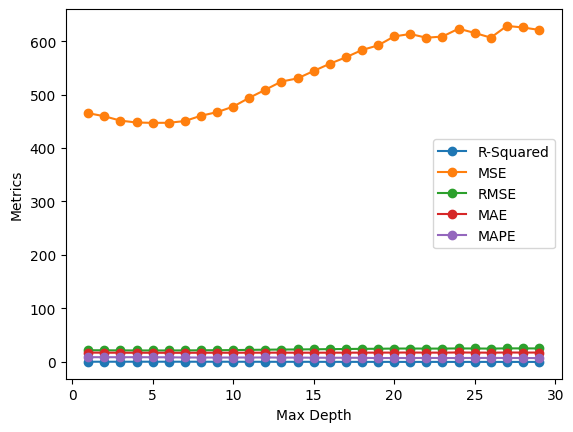

In [9]:
plt.plot(max_depth, r2_list, marker="o", label="R-Squared")
plt.plot(max_depth, mse_list, marker="o", label="MSE")
plt.plot(max_depth, rmse_list, marker="o", label="RMSE")
plt.plot(max_depth, mae_list, marker="o", label="MAE")
plt.plot(max_depth, mape_list, marker="o", label="MAPE")
plt.xlabel("Max Depth")
plt.ylabel("Metrics")
plt.legend()

In [10]:
best_depth = max_depth[np.argmax(mse_list)]
best_depth

27

## 2.4 - Performance for Test Dataset

In [11]:
# Define Model
decision_tree = DecisionTreeRegressor()
decision_tree.fit(
    pd.concat([X_train, X_val], axis=0), pd.concat([y_train, y_val], axis=0)
)

# Predict
y_pred_test = decision_tree.predict(X_test)

# Performance Metrics
r2_test = mt.r2_score(y_test, y_pred_test)
mse_test = mt.mean_squared_error(y_test, y_pred_test)
rmse_test = root_mean_squared_error(y_test, y_pred_test)
mae_test = mt.mean_absolute_error(y_test, y_pred_test)
mape_test = mt.mean_absolute_percentage_error(y_test, y_pred_test)

print(f"Test R2: {r2_test}")
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test MAPE: {mape_test}")

Test R2: -0.19145619235870637
Test MSE: 580.1211827861841
Test RMSE: 24.085704946838987
Test MAE: 15.964773028935493
Test MAPE: 6.1195717961067455


# 3.0 - Final Results

In [12]:
train_metrics = {
    "Algorithm": "Linear Regression",
    "R-Squared": np.round(r2_train, 3),
    "MSE": np.round(mse_train, 3),
    "RMSE": np.round(rmse_train, 3),
    "MAE": np.round(mae_train, 3),
    "MAPE": np.round(mape_train, 3),
}
validation_metrics = {
    "Algorithm": "Linear Regression",
    "R-Squared": np.round(r2_val, 3),
    "MSE": np.round(mse_val, 3),
    "RMSE": np.round(rmse_val, 3),
    "MAE": np.round(mae_val, 3),
    "MAPE": np.round(mape_val, 3),
}
test_metrics = {
    "Algorithm": "Linear Regression",
    "R-Squared": np.round(r2_test, 3),
    "MSE": np.round(mse_test, 3),
    "RMSE": np.round(rmse_test, 3),
    "MAE": np.round(mae_test, 3),
    "MAPE": np.round(mape_test, 3),
}

pd.DataFrame(train_metrics, index=[0]).to_csv(
    "./reg_train_metrics.csv", mode="a", header=False
)
pd.DataFrame(validation_metrics, index=[0]).to_csv(
    "./reg_validation_metrics.csv", mode="a", header=False
)
pd.DataFrame(test_metrics, index=[0]).to_csv(
    "./reg_test_metrics.csv", mode="a", header=False
)